Devanagari Handwritten Character Dataset Data Set 

Number of instances: 92k
Number of attributes: 1024, integer

Abstract: 
This is an image database of Handwritten Devanagari characters. There are 46 classes of characters with 2000 examples each. The dataset is split into training set(85%) and testing set(15%).

Source:
The dataset was created by extraction and manual annotation of thousands of characters from handwritten documents. 
Creator Name: Shailesh Acharya, Email: sailes437 '@' gmail.com, Institution: University of North Texas, Cell: +19402200157 
Creator Name: Prashnna Kumar Gyawali, Email: gyawali.prasanna '@' gmail.com, Institution: Rochester Institute of Technology

Data Set Information:
Data Type: GrayScale Image 
The image dataset can be used to benchmark classification algorithm for OCR systems. The highest accuracy obtained in the Test set is 98.47%. Model Description is available in the paper [Web Link] 
More information on the dataset at [Web Link]. 

Attribute Information:
Image Format: .png 
Resolution: 32 by 32 
Actual character is centered within 28 by 28 pixel, padding of 2 pixel is added on all four sides of actual character.

Citation Request:
The material maybe used for free with the following paper cited, 
S. Acharya, A.K. Pant and P.K. Gyawali â€œDeep Learning Based Large Scale Handwritten Devanagari Character Recognitionâ€,In Proceedings of the 9th International Conference on Software, Knowledge, Information Management and Applications (SKIMA), pp. 121-126, 2015.

https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset#

In [1]:
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

In [2]:
# Function to read csv file
# load data_array
def read_file(filename):
    line_count = 0
    file_open = open(filename,"r")
    data_array = []
    for line in iter(file_open):
        line1 = line.rstrip()
        line_split=line1.split(",")
        data_array.append(line_split)
    return data_array

In [ ]:
# read csv file into training data array by calling read_file
# set X2 attributes to all rows, columns 0 to 3071
# set y2 outcome to all rows, column 0 
train_images = read_file("dev_Train.csv")
print ("readfile")
dataset = np.array(train_images)
print ("dataset")
X2 = dataset[:,1:1025]
print ("X2")
y2 = dataset[:,0]
print ("y2")

In [5]:
# reclassify data type to int
X = X2.astype(np.int)
y = y2.astype(np.int)
print(X.shape)
print(y.shape)

(50000, 3072)
(50000,)


In [47]:
# Not using X2 and y2; delete and run garbage collection
del [[X2,y2]]
gc.collect()

0

In [48]:
# read csv file into test data array by calling read_file
# set X2_test attributes to all rows, columns 1 to784
# set y2_test outcome to all rows, column 0 
mnist_test = read_file("mnist_data/mnist_test.csv")
dataset_test = np.array(mnist_test)
X2_test = dataset_test[:,1:785]
y2_test = dataset_test[:,0]

In [49]:
# reclassify data type to int
X_test = X2_test.astype(np.int)
y_test = y2_test.astype(np.int)
print(X_test.shape)
print(y_test.shape)

# Not using X2_test and y2_test; make it minimum
del [[X2_test,y2_test]]
gc.collect()

(10000, 784)
(10000,)


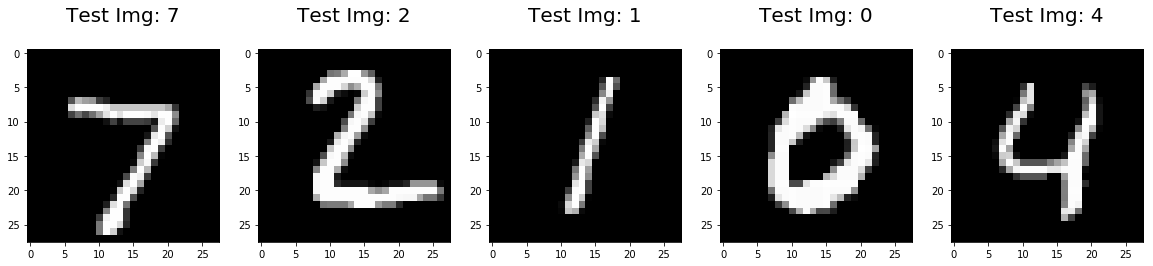

In [51]:
# show the first 5 test images
# plt.figure(figsize=(width",height"))
# enumerate 2 lists equal length simultaneously: enumerate(zip
# subplot (nrows, ncols, index) - plot within plot where index is the placement
# imshow (array(m,n scalar), cmap=colormap)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Test Img: %i\n' % label, fontsize = 20)

In [52]:
## Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       0.79      0.89      0.84       980
          1       0.85      0.95      0.90      1135
          2       0.90      0.26      0.40      1032
          3       0.71      0.35      0.47      1010
          4       0.88      0.17      0.29       982
          5       0.55      0.05      0.09       892
          6       0.65      0.93      0.77       958
          7       0.88      0.27      0.42      1028
          8       0.28      0.67      0.40       974
          9       0.37      0.95      0.53      1009

avg / total       0.69      0.56      0.52     10000

[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3   

# note: this may take a while!!
# Knn- classification
# k-Nearest Neighbor Classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [53]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
print(cm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       0.91      0.94      0.92       980
          1       0.96      0.96      0.96      1135
          2       0.88      0.86      0.87      1032
          3       0.83      0.86      0.84      1010
          4       0.88      0.88      0.88       982
          5       0.84      0.84      0.84       892
          6       0.89      0.89      0.89       958
          7       0.91      0.90      0.91      1028
          8       0.83      0.81      0.82       974
          9       0.86      0.85      0.86      1009

avg / total       0.88      0.88      0.88     10000

[[ 917    1

In [54]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs',random_state=10)
model.fit(X,y)
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)


In [55]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
print(cm)

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.93      0.88      0.90      1032
          3       0.90      0.91      0.90      1010
          4       0.93      0.93      0.93       982
          5       0.90      0.85      0.87       892
          6       0.94      0.95      0.95       958
          7       0.93      0.92      0.92      1028
          8       0.84      0.88      0.86       974
          9       0.90      0.89      0.90      1009

avg / total       0.92      0.92      0.92     10000

[[ 958    0    0    4    0    3    5    2    6    2]
 [   0 1116    3    1    0    1    4    1    8    1]
 [   8   12  906   18    9    5   10   11   50    3]
 [   3    0   19  916    2   23    5   11   24    7]
 [   1    2    5    3  910    0   11    2   10   38]
 [  11    2    1   40   10  754   16    8   39   11]
 [   7    3    7    2    4   17  911    1  

In [56]:
# Done with X and y, cleanup and garbage collect
del [[X,y]]
gc.collect()

11065

Text(0.5,103.74,'Predicted label')

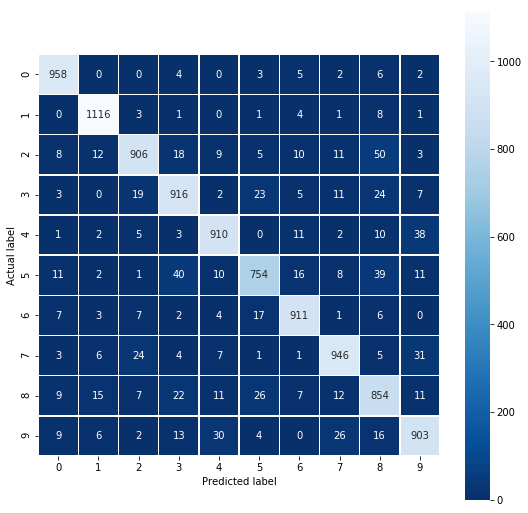

In [58]:
# heatmap of how often predicted label matched actual label
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label')

In [59]:
# Returns a NumPy Array
# Predict for One Observation (image)
model.predict(X_test[0].reshape(1,-1))
yy = model.predict(X_test[0].reshape(1,-1))
print(yy[0])

7


In [60]:
# Predict for Multiple Observations (images) at Once
model.predict(X_test[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [61]:
# Make predictions on entire test data
predictions = model.predict(X_test)

In [62]:
#how well did the model score?
score = model.score(X_test,y_test)
print(score)

0.9174


In [63]:
# Missclassifications
# for the values in test, create list of misclassified indexes
# print how many were misclassified and the first 5
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
print("Number of images misclassified: ",len(misclassifiedIndexes))
print(misclassifiedIndexes[0:5])

Number of images misclassified:  826
[8, 33, 38, 63, 66]


In [64]:
# round probabilities of X_test predictions to 2 digits
def print_rounded_probabilities(list1):
    class_digit = 0
    for x in list1:
        y = round(x,2)
        print(class_digit,"==>",y)
        class_digit += 1

In [65]:
# Make probabilities on entire test data
probabilities = model.predict_proba(X_test)
print(len(probabilities))
print(probabilities[0])

10000
[  1.34965756e-06   1.96813291e-16   7.25112606e-06   1.24813124e-02
   8.75899562e-07   2.26172884e-04   1.39597356e-10   9.83923498e-01
   1.18504862e-04   3.24103461e-03]


In [66]:
# print probabilities of first test record 
print_rounded_probabilities(probabilities[0])

0 ==> 0.0
1 ==> 0.0
2 ==> 0.0
3 ==> 0.01
4 ==> 0.0
5 ==> 0.0
6 ==> 0.0
7 ==> 0.98
8 ==> 0.0
9 ==> 0.0


In [67]:
print_rounded_probabilities(probabilities[8])
print(y_test[8])

0 ==> 0.0
1 ==> 0.0
2 ==> 0.0
3 ==> 0.0
4 ==> 0.02
5 ==> 0.02
6 ==> 0.96
7 ==> 0.0
8 ==> 0.0
9 ==> 0.0
5


In [68]:
print_rounded_probabilities(probabilities[33])
print(y_test[33])

0 ==> 0.23
1 ==> 0.0
2 ==> 0.0
3 ==> 0.0
4 ==> 0.26
5 ==> 0.0
6 ==> 0.5
7 ==> 0.0
8 ==> 0.01
9 ==> 0.0
4


In [69]:
# save the model to disk
import pickle
filename = 'mnist_logreg.pkl'
pickle.dump(model, open(filename, 'wb'))

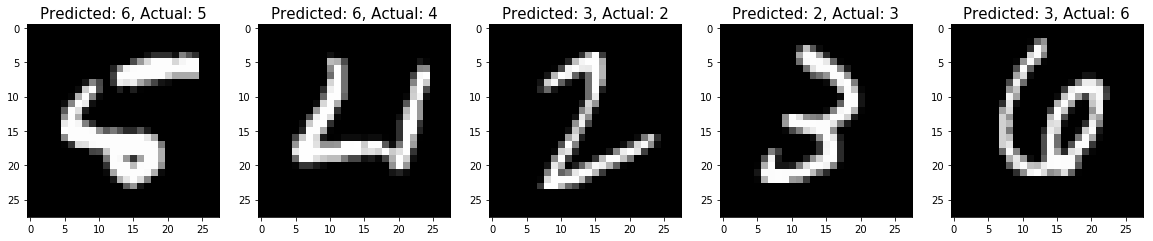

In [70]:
# show the first 5 test images
# plt.figure(figsize=(width",height"))
# enumerate 2 lists equal length simultaneously: enumerate(zip
# subplot (nrows, ncols, index) - plot within plot where index is the placement
# imshow (array(m,n scalar), cmap=colormap)

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

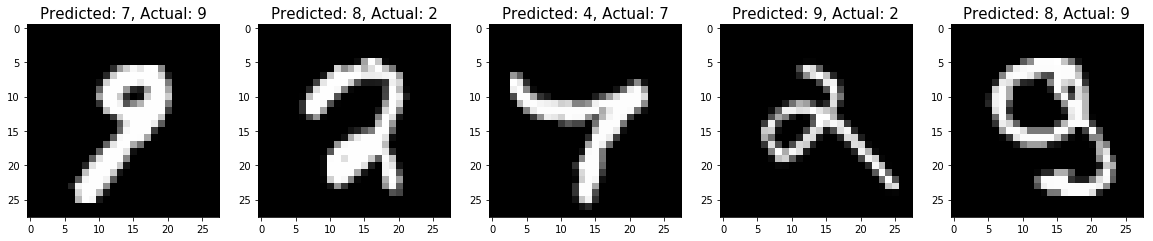

In [71]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[5:10]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

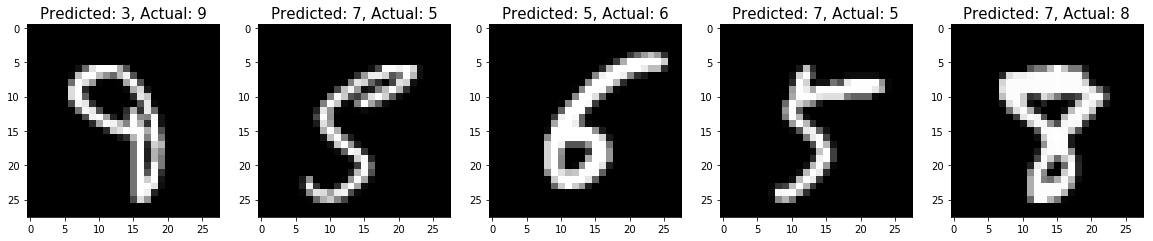

In [72]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[11:16]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

In [73]:
# Done with X_test, y_test, predictions,misclassifiedIndexes
del [[X_test,y_test,predictions,misclassifiedIndexes]]
gc.collect()

33265

In [74]:
import gzip
line_count = 0
with gzip.open('mnist_data/train-images-idx3-ubyte.gz','r') as fin:
    for line in fin:
        line_count += 1
        if (line_count < 2):
            print('got line', line,"\n")

got line b"\x00\x00\x08\x03\x00\x00\xea`\x00\x00\x00\x1c\x00\x00\x00\x1c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x12\x12\x12~\x88\xaf\x1a\xa6\xff\xf7\x7f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e$^\x9a\xaa\xfd\xfd\xfd\xfd\xfd\xe1\xac\xfd\xf2\xc3@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x001\xee\xfd\xfd\xfd\xfd\xfd\xfd\xfd\xfd\xfb]RR8'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x12\xdb\xfd\xfd\xfd\xfd\xfd\xc6\x

In [75]:
# How to read image and dump pixel data
# PIL => Python Imaging Library
from PIL import Image
import numpy as np 
im = Image.open('1339.png') #relative path to file 
im.show()

In [76]:
print(im.format)
print(im.size)
pic_array = np.array(im)
pic_flat_list = pic_array.reshape(-1)
pic_list = pic_flat_list.tolist()
pic_string = ",".join(map(lambda x: str(x),pic_list))
file_write = open("pic1.csv","w")
file_write.write(pic_string)
file_write.close()  
print(pic_string)

PNG
(32, 32)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,11,43,69,106,150,237,223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10,31,62,78,97,122,148,183,210,239,255,255,250,234,227,226,0,0,0,0,0,0,1,15,27,59,64,75,92,109,169,218,244,254,255,255,255,247,235,213,174,133,91,49,19,5,4,8,0,0,0,0,0,0,42,241,252,255,255,255,255,254,244,208,168,254,219,49,40,18,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,111,169,177,143,88,58,44,11,2,57,254,197,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,255,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,221,255,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,255,254,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,200,255,239,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,181,255,202,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,132,173,175,81,2,128,255,109,0,0,0,0,0,0,0,0,0,0,0,0